In [1]:
#梯度下降法 非线性逻辑回归
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
scale = False

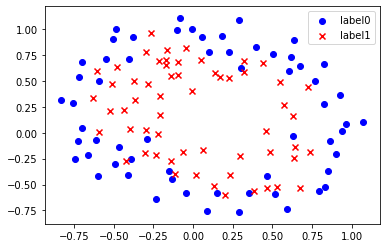

In [35]:
#载入数据

data = np.genfromtxt('LR-testSet2.txt', delimiter= ',')
x_data = data[:,:-1]
y_data = data[:, -1,np.newaxis]#注意在后面的运算当中一定要加偏置值
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c= 'b', marker='o')
    scattter1 = plt.scatter(x1, y1, c = 'r', marker = 'x')
    plt.legend(handles = [scatter0, scattter1], labels = ['label0', 'label1'], loc= 'best')
#         plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plot()

In [6]:
#定义多项式回归

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_data)


In [7]:
#对位相乘  注意这里的含义，因为是两个数相乘累加
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat * ws))) 
    right = np.multiply(1-yMat, np.log(1-sigmoid(xMat *ws)))
    return np.sum(left + right)/ -(len(xMat))
                      
def gradAscent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
                      
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
        
    Ir = 0.03
    epochs = 50000
    costList = []#保存cost的值
                      
    m,n = np.shape(xMat)
        #初始化权值
    ws = np.mat(np.ones((n,1)))
                      
    for i in range(epochs + 1):
        h = sigmoid(xMat*ws)
                      
        ws_grad = xMat.T * (h - yMat)/m #两个矩阵相乘累加
        ws = ws - Ir * ws_grad

        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
    return ws,costList
#     else:
#         return ('scale is false')

In [8]:
ws,costList = gradAscent(x_poly, y_data)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


(38024, 1)


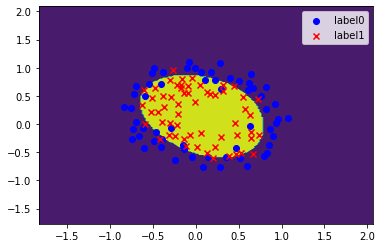

In [28]:
#获取范围
x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
#生成网格矩阵
xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min,y_max,0.02))

z =sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))
for  i in range(len(z)):
    if z[i] >0.5:
        z[i] = 1
    else:
        z[i] = 0
print(z.shape)
z = z.reshape(xx.shape)

cs =plt.contourf(xx,yy,z)
plot()
plt.show()

In [32]:
#预测
def predict(x_data, ws):
#     if scale == True:
#         x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >=0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)
print(classification_report(y_data,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118

